Name: Chia-Wei Chang </br>
Preparations for Final Project

Part A. Connect to Spotify API

Step 1. Install Spotipy library: You can install the Spotipy library using pip, by running the following command in your terminal or command prompt.

In [ ]:
# pip install spotipy
# conda install -c conda-forge spotipy

Step 2. Import the Spotipy library: In your Python code, you can import the Spotipy library by adding the following line at the beginning of your script.

In [3]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

Step 3. Set up your Spotify API credentials: You will need to set up your Spotify API credentials to be able to access the API. You can do this by creating a Spotify Developer account and creating a new app. Once you have created an app, you will be provided with a Client ID and Client Secret. You will need to use these credentials to authenticate your application with the Spotify API.

In [4]:
client_id = "af41dd34ac11488c9351e2632411d974"
client_secret = "1d69550688494d4c91dbdd5f7ccf769c"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Step 4. Make API requests: Once you have set up your credentials, you can start making API requests using the Spotipy library. For example, to get the top tracks for an artist, you can use the following code.

This code searches for the artist "Ed Sheeran," gets the artist's ID, and then gets the artist's top tracks using the artist_top_tracks() method. It then prints the names of the top tracks to the console.

In [10]:
artist_name = "Ed Sheeran"
results = sp.search(q=artist_name, type="artist")
artist_id = results["artists"]["items"][0]["id"]
top_tracks = sp.artist_top_tracks(artist_id)
for track in top_tracks["tracks"]:
    print(track["name"])

Perfect
Shivers
Shape of You
Bad Habits
Bam Bam (feat. Ed Sheeran)
Photograph
Thinking out Loud
Celestial
For My Hand (feat. Ed Sheeran)
I Don't Care


Part B. Preprocess data from the Spotify API for machine learning.

Step 1. Get a list of rock artists: First, you need to get a list of rock artists from the Spotify API. You can use the search() method of the Spotipy library to search for rock artists by specifying the genre as "rock" and the type as "artist". The following code will return a list of artists who are classified as "rock" by Spotify.

In [11]:
results = sp.search(q='genre:"rock"', type='artist')

Step 2. Get the top tracks for each artist: Once you have a list of rock artists, you can use the artist_top_tracks() method of the Spotipy library to get the top tracks for each artist. You can use a loop to iterate over the list of artists and get their top tracks. The following code loops over the list of rock artists returned by the search and gets the top tracks for each artist using the artist_top_tracks() method. It then appends the artist name, track ID, and track name to a list called rock_artists.

In [12]:
rock_artists = []
for artist in results['artists']['items']:
    top_tracks = sp.artist_top_tracks(artist['id'])
    for track in top_tracks['tracks']:
        rock_artists.append((artist['name'], track['id'], track['name']))

Step 3. Get the audio features for each track: Once you have a list of rock tracks, you can use the audio_features() method of the Spotipy library to get the audio features for each track. You can use a loop to iterate over the list of tracks and get their audio features. The following code loops over the list of rock tracks and gets the audio features for each track using the audio_features() method. It then adds the artist name and track name to the features dictionary and appends it to a list called rock_tracks.

In [18]:
rock_tracks = []
for artist, track_id, track_name in rock_artists:
    features = sp.audio_features(track_id)[0]
    features['artist'] = artist
    features['track_name'] = track_name
    rock_tracks.append(features)

Step 4. Convert the data to a Pandas dataframe: Once you have a list of rock tracks with their audio features, you can convert the data to a Pandas dataframe for easier manipulation and preprocessing. The following code creates a Pandas dataframe from the rock_tracks list.

In [19]:
df = pd.DataFrame(rock_tracks)
df.to_csv("9. Rockify_Dataset.csv", index=False)

Step 5. Preprocess the data: Finally, you can preprocess the data to prepare it for machine learning. This will depend on the specific machine learning algorithm you plan to use, but some common preprocessing steps include scaling the features, encoding categorical variables, and splitting the data into training and testing sets. Once you have preprocessed the data, you can use it to train a machine learning model to distinguish between different rock subgenres. Some common machine learning algorithms for classification tasks like this include decision trees, random forests, and support vector machines.

In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Split the data into training and testing sets: 
# This is done using the train_test_split() method from scikit-learn. 
# We drop the non-numeric columns from the input data and 
# use the artist names as the output labels.
X = df.drop(['artist', 'track_name', 'id', 'track_href', 'uri', 'analysis_url', 'type'], axis=1)  # drop non-numeric columns
y = df['artist']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features: This is done using the StandardScaler() method from scikit-learn. 
# This ensures that all the features are on the same scale, 
# which can help the classifier to perform better.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the labels: This is done using the LabelEncoder() method from scikit-learn. 
# This converts the artist names to numeric labels, 
# which can be used as input to the classifier.
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train a random forest classifier: 
# This is done using the RandomForestClassifier() method from scikit-learn. 
# We use 100 trees in the forest and set the random state for reproducibility.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the performance of the classifier: 
# This is done using the score() method of the classifier. 
# We calculate the accuracy of the classifier on the test set.
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4


Part C. Train a machine learning model to distinguish between different rock subgenres using the preprocessed data.

Step 1. To make predictions using the trained model, you can use the predict() method of the classifier. The following code will give you a report that summarizes the precision, recall, and F1 score of the classifier for each class. This can help you evaluate the performance of the classifier and identify any potential issues.

In [21]:
# Make predictions using the trained model
y_pred = rf.predict(X_test)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.25      0.40         4
           2       0.25      1.00      0.40         1
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.25      1.00      0.40         1
           9       0.50      0.50      0.50         4

    accuracy                           0.40        20
   macro avg       0.40      0.42      0.34        20
weighted avg       0.53      0.40      0.39        20



/Users/wei/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wei/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wei/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/wei/opt/anaconda3/lib/pyth

Step 2. Visualize the performance of the classifier using a confusion matrix. This will give you a visual representation of how the classifier is performing on each class.

/Users/wei/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


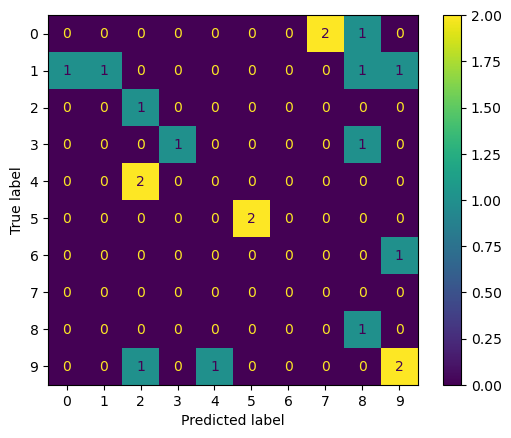

In [22]:
# Plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)